In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.19.0


In [3]:
from keras.models import Sequential
from keras.datasets import mnist

In [4]:
import matplotlib.pyplot as ply

In [5]:
import numpy as np

In [6]:
import random

In [7]:
(x_train,y_train) ,(x_test, y_test) = mnist.load_data()

In [8]:
print(x_train.shape , x_test.shape )

(60000, 28, 28) (10000, 28, 28)


In [9]:
x_train.max()

255

In [10]:
x_train = x_train /255 
x_test = x_test /255  #Normalize

In [11]:
print(x_test, x_test.shape)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]] (10000, 28

In [12]:
import keras 
model =Sequential()

In [13]:
#Input layer
model.add(keras.layers.Flatten(input_shape=(28, 28) ))

C:\Users\shubham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.add(keras.layers.Dense(128, activation='relu') )
# hidden layer

In [15]:
model.add(keras.layers.Dense(64, activation= 'relu') )

In [16]:
model.add(keras.layers.Dense(10, activation = 'softmax') )

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train model using SGD(None, 128) 

In [27]:
model.compile(optimizer = 'sgd' , loss ='sparse_categorical_crossentropy', metrics =["accuracy"]) 

In [30]:
H = model.fit(x_train, y_train , validation_data = ( x_test, y_test ), epochs= 5 )

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9733 - loss: 0.0920 - val_accuracy: 0.9690 - val_loss: 0.1031
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9745 - loss: 0.0866 - val_accuracy: 0.9697 - val_loss: 0.0994
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9773 - loss: 0.0805 - val_accuracy: 0.9704 - val_loss: 0.0983
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9783 - loss: 0.0760 - val_accuracy: 0.9714 - val_loss: 0.0938
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9788 - loss: 0.0741 - val_accuracy: 0.9717 - val_loss: 0.0923


In [21]:
H = model.fit( x_train, y_train , validation_data = ( x_test, y_test ), epochs= 7 )

Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9516 - loss: 0.1677 - val_accuracy: 0.9544 - val_loss: 0.1529
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9555 - loss: 0.1491 - val_accuracy: 0.9574 - val_loss: 0.1413
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9614 - loss: 0.1355 - val_accuracy: 0.9610 - val_loss: 0.1330
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9648 - loss: 0.1232 - val_accuracy: 0.9617 - val_loss: 0.1253
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9662 - loss: 0.1171 - val_accuracy: 0.9637 - val_loss: 0.1201
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9706 - loss: 0.1012 - val_accuracy: 0.9660 - val_loss: 0.1141
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9725 - loss: 0.0966 - val_accuracy: 0.9660 - val_loss: 0.1094


In [22]:
test_loss, test_acc = model.evaluate(x_test, y_test )
print("Loss = " , test_loss)
print("Accuracy = " , test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9605 - loss: 0.1248
Loss =  0.10939078032970428
Accuracy =  0.9660000205039978


In [23]:
import matplotlib.pyplot as plt


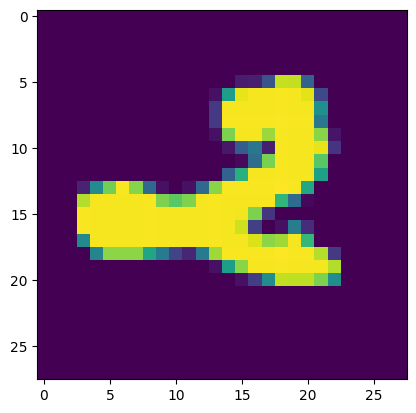

In [24]:
n = random.randint(0, 9999)
plt.imshow(x_test[n] )
plt.show()

In [25]:
prediction = model.predict(x_test)
prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[7.3889569e-06, 4.0839035e-07, 9.1018308e-05, ..., 9.9955958e-01,
        3.3568871e-05, 5.8448088e-05],
       [2.2375503e-05, 5.6344428e-04, 9.9289328e-01, ..., 1.8019498e-10,
        3.6888290e-05, 5.2849219e-10],
       [4.8192242e-06, 9.8909014e-01, 1.6221593e-03, ..., 3.1646534e-03,
        1.7894732e-03, 9.4926836e-05],
       ...,
       [7.6512556e-09, 8.1599066e-10, 2.7432037e-09, ..., 2.0197785e-06,
        3.9372153e-05, 2.2691641e-04],
       [1.5631211e-07, 1.0235026e-06, 3.7135276e-08, ..., 3.9877666e-08,
        1.1804419e-03, 2.4557091e-08],
       [6.6074148e-07, 1.6916181e-09, 2.1768939e-05, ..., 1.7067662e-09,
        6.9511162e-07, 1.4044298e-09]], dtype=float32)

In [26]:
np.argmax(prediction[n] )

2

In [28]:
prediction[n]

array([5.4074364e-05, 1.3252647e-06, 8.5517007e-01, 9.2891537e-02,
       2.8616641e-02, 1.6290600e-05, 1.9061108e-05, 7.0725240e-05,
       1.5035219e-04, 2.3009878e-02], dtype=float32)

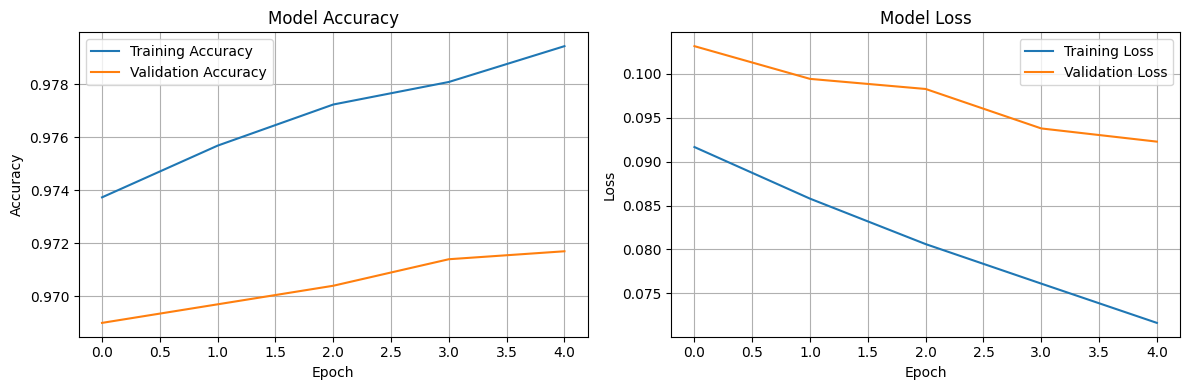

In [31]:
# Plot training history to show learning progress
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(H.history['accuracy'], label='Training Accuracy')
plt.plot(H.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(H.history['loss'], label='Training Loss')
plt.plot(H.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()